In [102]:
# 머신러닝에 필요한 라이버리들

!pip3 install scikit-learn
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3

In [103]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
#임의로 weight, heights 데이터 만듬

weights = [87, 81, 82, 92, 90, 61, 86, 66, 69, 69]
heights = [187, 174, 179, 192, 188, 160, 179, 168, 168, 174]
print(len(weights))
print(len(heights))

10
10


In [105]:
#딕셔너리로 만들기
#딕셔너리: 'height'가 컬럼명이 되고, heights가 축이 됨
#dataframe: 시각화 편하게 하기 위해서 만듬

body_df = pd.DataFrame({'height' : heights, 'weight' : weights})
body_df.head(3)

height  weight
0     187      87
1     174      81
2     179      82

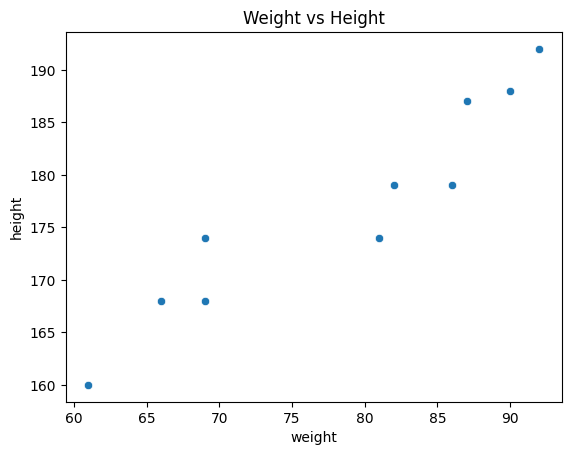

In [106]:
#weight, height간 산점도(scatterplot)
#산점도 = 시각화

sns.scatterplot(data=body_df, x='weight', y='height')
plt.title('Weight vs Height')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [107]:
# 선형회귀 훈련하기 위해 도안 가져오기
#바로 linearregression 쓰기 불가(model_lr 쓴 이유)
#linearregression이 뭔지 알려줘야 함

from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
type(model_lr)

sklearn.linear_model._base.LinearRegression

In [108]:
#dataframe[]: seris
#dataframe[[]]: dataframe

x=body_df[['weight']]
y=body_df[['height']]

In [109]:
x.head(3)

weight
0      87
1      81
2      82

In [110]:
y.head(3)

height
0     187
1     174
2     179

In [111]:
#데이터 훈련(x는 대문다, y는 소문자)
#y=ax+b에서 x과 y가 최선의 값들을 찾기 위해서 쓰이는 코드

model_lr.fit(X = x, y = y)

LinearRegression()

In [112]:
#가중치(w1)

print(model_lr.coef_)

#편향(bias, w0)
print(model_lr.intercept_)


[[0.86251245]]
[109.36527488]


In [113]:
w1 = model_lr.coef_[0][0]
w0 = model_lr.intercept_[0]

In [114]:
print('y={}x + {}'.format(w1.round(2),w0.round(2)))

#y height는 몸무게에 0.86을 곱한뒤 109.37을 곱하면 됨

#{}는 파이썬의 문자열 포매팅에서 자리 표시자 (placeholder) 역할을 해. 문자열 안에서 특정 위치에 변수를 삽입할 자리나 값을 표시하는 곳


y=0.86x + 109.37


In [115]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn - Configure global settings and get information about the working environment.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _built_with_meson
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experimental (package)
    externals (package)
    feature_extraction (package)
    feature_selection (package)
    gaussian_process (package)
    impute (package)
    inspection (package)
    isotonic
    kernel_approximation
    kernel_ridge
    linear_model (package)
    manifold (package)
    metrics (package)
    mixture (package)
    model_selection (package)
    multiclass
    multioutput
    naive_bayes
    neig

In [116]:
#MSE 계산
# y = 0.86x + 109.37
# 활용하여 예측 컬럼을 추가
#에러값을 각각 계산(error)
#양수를 만들기위해 제곱
#모두 더할 예정(MSE)

#위는 MSE를 만들기 위한 과정
#MSE: 측이 얼마나 실제와 다른지 보여주는 지표
#MSE: 예측값과 실제값의 차이(오차)를 제곱해서 평균을 구한값?

In [117]:
print(w1, w0)

0.8625124535821029 109.36527488452136


In [118]:
#컬럼: 예측값
#pred라는 컬럼을 만듬

#weight가 x니까 넣은 것

body_df['pred'] = body_df['weight']*w1 + w0
body_df.head(3)

height  weight        pred
0     187      87  184.403858
1     174      81  179.228784
2     179      82  180.091296

In [119]:
#에러
#error = y값-prediction
body_df['error'] = body_df['height']-body_df['pred']
body_df.head(3)

height  weight        pred     error
0     187      87  184.403858  2.596142
1     174      81  179.228784 -5.228784
2     179      82  180.091296 -1.091296

In [120]:
#상쇄가 되니까 제곱함

body_df['error^2'] = body_df['error']*body_df['error']
body_df.head(3)

height  weight        pred     error    error^2
0     187      87  184.403858  2.596142   6.739951
1     174      81  179.228784 -5.228784  27.340178
2     179      82  180.091296 -1.091296   1.190927

In [121]:
#MSE 계산: 10

body_df['error^2'].sum()/len(body_df)

np.float64(10.152939045376318)

<Axes: xlabel='weight', ylabel='height'>

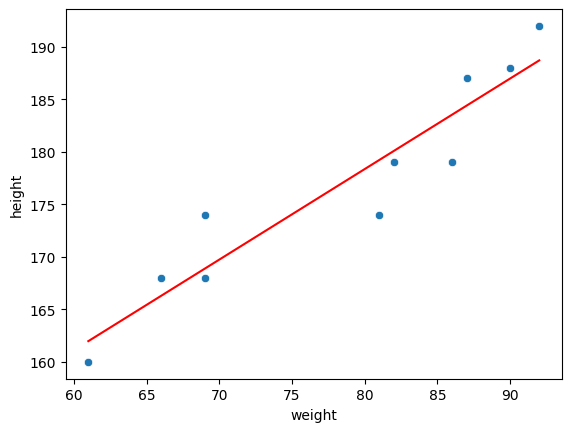

In [122]:
#선점도 그래프에 선항식 만들어서 그래프 그리기
#선형회귀를 만들어봄

sns.scatterplot(data=body_df,x='weight', y='height')
sns.lineplot(data=body_df, x='weight', y='pred', color = 'red')

In [123]:
#선형회귀 모델 평가
#회귀(숫자 맞추는 방법): MSE(수동계산은 10)
#R square 값이 평균대비 설명력, 1일수록 높은것, 0이면 낮음

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [124]:
#처음에 만드는 식은 그냥 틀을 만드는 거고 그 다음으로는 식을 업그레이드를 해서 더 여측하기 쉽도록 식을 만드는것

In [125]:
from sklearn.metrics import mean_squared_error, r2_score


In [126]:
######height, pred

In [ ]:
#평가함수는 공통적으로 정답(실제 true), 예측값(pred)
#MSE를 구하는 것

#mean_squared_error:예측값과 실제값의 차이(오차)를 제곱해서 평균을 구한값

y_true = body_df['height']
y_pred = body_df['pred']
mean_squared_error(y_pred, y_true)

np.float64(10.152939045376318)

In [128]:
#R2: 모델이 전체 데이터의 분산을 얼마나 잘 설명하는지 비율로 나타냄.

r2_score(y_true, y_pred)

0.8899887415172141

In [ ]:
#######선형회귀 실습

In [129]:
#seaborn 라이버리는 기본적으로 데이터 제공

tips_df = sns.load_dataset('tips')
tips_df.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

In [ ]:
# x: total bill, y: tip
#model_lr2를 써야 predict,y를 이용해서 식을 만들수 있


model_lr2 = LinearRegression()
X = tips_df[['total_bill']]
y = tips_df[['tip']]
model_lr2.fit(X,y)

LinearRegression()

<Axes: xlabel='total_bill', ylabel='tip'>

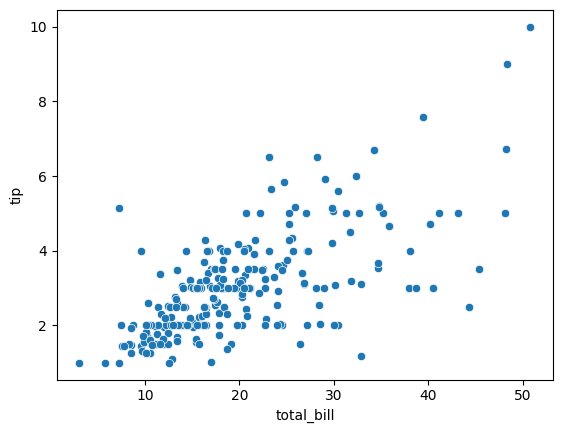

In [ ]:
#산점도 넣기

sns.scatterplot(data=tips_df, x='total_bill', y='tip')
sns.lineplot()

In [132]:
#식 구하기
w1_tip = model_lr2.coef_[0][0]
w0_tip = model_lr2.intercept_[0]

In [148]:
print(w1_tip)

0.10502451738435332


In [133]:
print('y={}x + {}'.format(w1_tip.round(2),w0_tip.round(2)))

#해석: 전체 결제 금액이 1달러 오를때, 팁은 0.11 달러 추가됨
#전체 결제금액 100달러 오를떄 팀은 11달러 추가

y=0.11x + 0.92


In [ ]:
#예측값 
#prediction 만들때 위와는 다르게 간편한 code를 이용한 것

y_true_tip = tips_df['tip']
y_pred_tip = model_lr2.predict(tips_df[['total_bill']])

In [135]:
mean_squared_error(y_true_tip, y_pred_tip)

np.float64(1.036019442011377)

In [ ]:
#R2: 모델이 전체 데이터의 분산을 얼마나 잘 설명하는지 비율로 나타냄.

r2_score(y_true_tip, y_pred_tip)

#좋은 모델은 아님

0.45661658635167657

In [150]:
#tips_df의 예측값
tips_df['pred'] = y_pred_tip
tips_df

total_bill   tip     sex smoker   day    time  size      pred  sex_en
0         16.99  1.01  Female     No   Sun  Dinner     2  2.704636       1
1         10.34  1.66    Male     No   Sun  Dinner     3  2.006223       1
2         21.01  3.50    Male     No   Sun  Dinner     3  3.126835       1
3         23.68  3.31    Male     No   Sun  Dinner     2  3.407250       1
4         24.59  3.61  Female     No   Sun  Dinner     4  3.502822       1
..          ...   ...     ...    ...   ...     ...   ...       ...     ...
239       29.03  5.92    Male     No   Sat  Dinner     3  3.969131       1
240       27.18  2.00  Female    Yes   Sat  Dinner     2  3.774836       1
241       22.67  2.00    Male    Yes   Sat  Dinner     2  3.301175       1
242       17.82  1.75    Male     No   Sat  Dinner     2  2.791807       1
243       18.78  3.00  Female     No  Thur  Dinner     2  2.892630       1

[244 rows x 9 columns]

<Axes: xlabel='total_bill', ylabel='tip'>

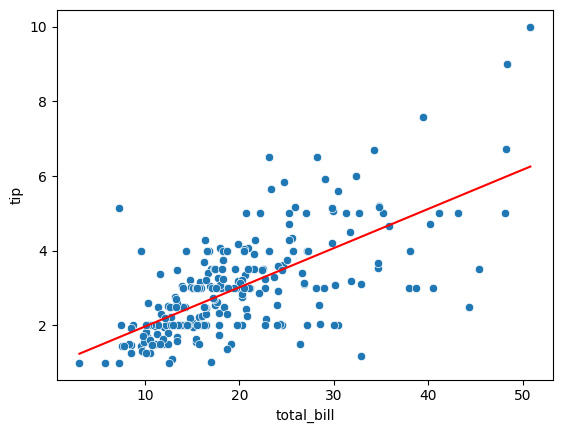

In [138]:

sns.scatterplot(data=tips_df, x='total_bill', y='tip')
sns.lineplot(data=tips_df, x='total_bill', y='pred', color='red')


In [139]:
#단순선형회귀: x값 1개


In [152]:
#범주형 데이터 사용하기 
#함수 사용 가능, Sklearn ㅎㅁ수 사용 가능
tips_df.head()

total_bill   tip     sex smoker  day    time  size      pred  sex_en
0       16.99  1.01  Female     No  Sun  Dinner     2  2.704636       1
1       10.34  1.66    Male     No  Sun  Dinner     3  2.006223       1
2       21.01  3.50    Male     No  Sun  Dinner     3  3.126835       1
3       23.68  3.31    Male     No  Sun  Dinner     2  3.407250       1
4       24.59  3.61  Female     No  Sun  Dinner     4  3.502822       1

In [141]:
#female 0, male1
def get_sex(x):
    if x == 'female':
        return 0
    else:
        return 1

In [142]:
#Apply method는 매 행을 특정한 함수를 적용
tips_df['sex_en']=tips_df['sex'].apply(get_sex)
tips_df.head(3)


total_bill   tip     sex smoker  day    time  size      pred  sex_en
0       16.99  1.01  Female     No  Sun  Dinner     2  2.704636       1
1       10.34  1.66    Male     No  Sun  Dinner     3  2.006223       1
2       21.01  3.50    Male     No  Sun  Dinner     3  3.126835       1

In [143]:
#모델설계도 가져오기
#학습, 평가
model_lr3 = LinearRegression()
x = tips_df[['total_bill', 'sex_en']]
y = tips_df[['tip']]

In [155]:
X

total_bill
0         16.99
1         10.34
2         21.01
3         23.68
4         24.59
..          ...
239       29.03
240       27.18
241       22.67
242       17.82
243       18.78

[244 rows x 1 columns]

In [144]:
#학습
model_lr3.fit(X,y)

LinearRegression()

In [ ]:
#예측
y_pred_tip2 = model_lr3.predict(X)
y_pred_tip2[:5]

array([[2.70463616],
       [2.00622312],
       [3.12683472],
       [3.40725019],
       [3.5028225 ]])

In [146]:
#단순선형뇌귀 mse: x변수가 전체 금액
#다중선형회귀 mse: x변수가 전체 금액, 성별
print('단순선형회귀', mean_squared_error(y_true_tip, y_pred_tip))
print('다중선형회귀', mean_squared_error(y_true_tip, y_pred_tip2))

단순선형회귀 1.036019442011377
다중선형회귀 1.036019442011377


In [147]:
tips_df

total_bill   tip     sex smoker   day    time  size      pred  sex_en
0         16.99  1.01  Female     No   Sun  Dinner     2  2.704636       1
1         10.34  1.66    Male     No   Sun  Dinner     3  2.006223       1
2         21.01  3.50    Male     No   Sun  Dinner     3  3.126835       1
3         23.68  3.31    Male     No   Sun  Dinner     2  3.407250       1
4         24.59  3.61  Female     No   Sun  Dinner     4  3.502822       1
..          ...   ...     ...    ...   ...     ...   ...       ...     ...
239       29.03  5.92    Male     No   Sat  Dinner     3  3.969131       1
240       27.18  2.00  Female    Yes   Sat  Dinner     2  3.774836       1
241       22.67  2.00    Male    Yes   Sat  Dinner     2  3.301175       1
242       17.82  1.75    Male     No   Sat  Dinner     2  2.791807       1
243       18.78  3.00  Female     No  Thur  Dinner     2  2.892630       1

[244 rows x 9 columns]

<Axes: xlabel='sex', ylabel='tip'>

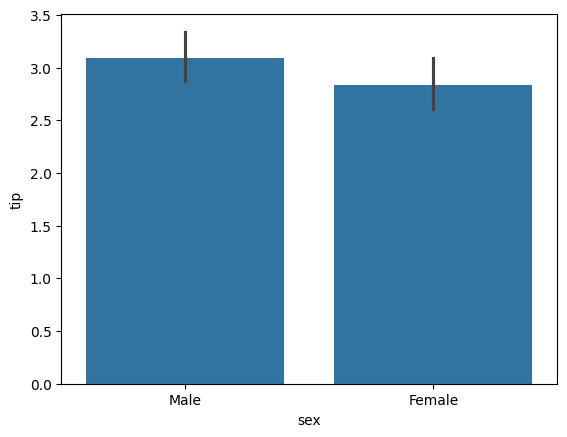

In [156]:
sns.barplot(data=tips_df, x='sex', y='tip')